- 회귀는 여러 개의 독립변수(feature)와 한 개의 종속변수(label) 간의 상관관계를 모델링하는 기법을 통칭한다.

- 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것이다.

```
     독립 변수 개수       |     회귀 계수의 결합
     ----------------------------------------
     1개 : 단일 회귀      |   선형 : 선형 회귀
     여러 개 : 다중 회귀   |  비선형 : 비선형 회귀
```

### 단순선형회귀

<img src='./img/LinearR.jpg' width='320' height='236' border='2'>

#### $RSS (w_{0}, w_{1}) = R(w) = \dfrac{1}{N}\textstyle\sum_{i=1}^N(y_{i}-(w_{0}+w_{1}*x_{i}))^{2}$

이 RSS를 최소로 하는 $w_{0}, w_{1}$ 즉 회귀 계수를 학습을 통해서 찾는 것이 머신러닝 기반 회귀의 핵심사항

### 경사 하강법(Gradient descent)

1. W 파라미터가 많을 경우에는 고차원 방정식을 이용해야하고, 이를 푸는 것도 현실적이지가 않기 때문에 경사 하강법을 이용한다.

2. 경사 하강법은 고차원 방정식에 대한 문제를 해결해 주면서 비용 함수 RSS를 최소화하는 방법을 직관적으로 제공하는 뛰어난 방식

3. '데이터를 기반으로 알고리즘이 스스로 학습한다'는 머신러닝의 개념을 가능하게 만들어준 핵심 기법의 하나

위의 비용 함수를 $w_{0}$와 $w_{1}$로 편미분하여 새로운 값으로 계속 업데이트 해준다.

#### $new\_w_{0} = old\_w_{0} + \eta\dfrac{2}{N}\textstyle\sum_{i=1}^N(실제값_{i} - 예측값_{i})$

#### $new\_w_{1} = old\_w_{1} + \eta\dfrac{2}{N}\textstyle\sum_{i=1}^N x_{i}*(실제값_{i} - 예측값_{i})$

#### $R(w) = \dfrac{1}{N}\textstyle\sum_{i=1}^N(y_{i}-(new\_w_{0}+new\_w_{1}*x_{i}))^{2}$

더 이상 비용함수의 값이 감소하지 않으면 그때의 $w_{0}$, $w_{1}$ 값을 구하고 반복을 중지함

### 경사하강법 구현

간단한 회귀 식인 $y = 4x + 6$을 근사하기 위한 100개의 데이터 세트를 만들고 경사 하강법을 이용해 $w_{0}$와 $w_{1}$을 도출

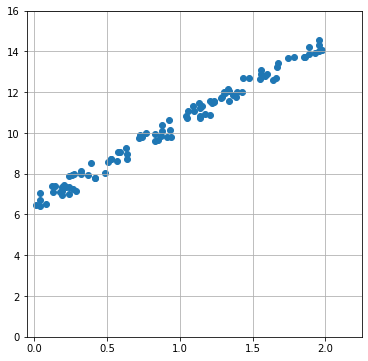

In [35]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# y = 4x + 6을 근사 (w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100, 1)
y = 6 + 4*x + np.random.rand(100,1)

plt.figure(figsize=(6, 6), facecolor='white')
plt.scatter(X, y)
plt.xlim([-0.05, 2.25]); plt.ylim([0,16])
plt.grid()
plt.show()

---

In [36]:
## 비용함수 정의
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

#### gradient_descent 함수

1. $w_{0}$와 $w_{1}$을 모두 0으로 초기화한 뒤 iters 개수만큼 반복하면서 $w_{0}$와 $w_{1}$를 업데이트

2. 위에서 무작위로 생성된 x, y를 입력으로 받음. 이 X, y는 모두 넘파이 ndarray

#### get_weight_update 함수

1. 100개의 데이터 X(1, 2, ..., 100)이 있다면 예측값은 w0 + X(1)w1 + X(2)w1 + ... + X(100)w1 이고, 이는 다음과 같이 계산 가능

2. y_pred = np.dot(X, w1.T) + w0

3. 반환 값은 업데이트 된 가중치인 w1_update, w0_update

In [37]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01) -> 'ndarray':
    N = len(y)
    
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))
    
    # w1과 w0를 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

#### gradient_descent_steps 함수

get_weight_updates를 경사 하강 방식으로 반복적으로 수행하여 w1과 w0를 업데이트 하는 함수

In [38]:
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

w1: 4.028 , w0: 6.490
Gradient Descent Total Cost : 0.0775


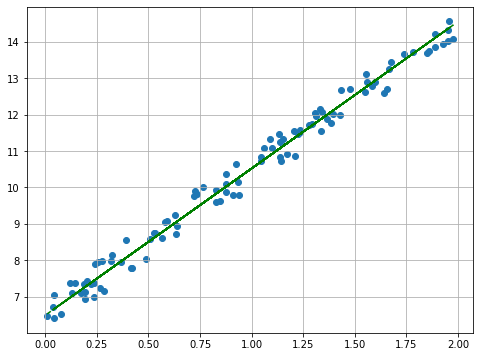

In [46]:
### 학습
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print(f'w1: {w1[0,0]:.3f} , w0: {w0[0,0]:.3f}')

y_pred = w1[0,0]*X + w0
print(f'Gradient Descent Total Cost : {get_cost(y, y_pred):.4f}')

plt.figure(figsize=(8,6), facecolor='white')
plt.scatter(X, y)
plt.plot(X, y_pred, 'g--')
plt.grid()
plt.show()

---

### 보스턴 주택 가격 회귀 구현 (305p)